# Inferences, Comparision, Visualization

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Get data

In [2]:
companies_returns = pd.read_csv('./COMPANIES_BASELINES.csv')
backtests_returns = pd.read_csv('./BACKTESTS_BASELINES.csv')


## Visualize company returns

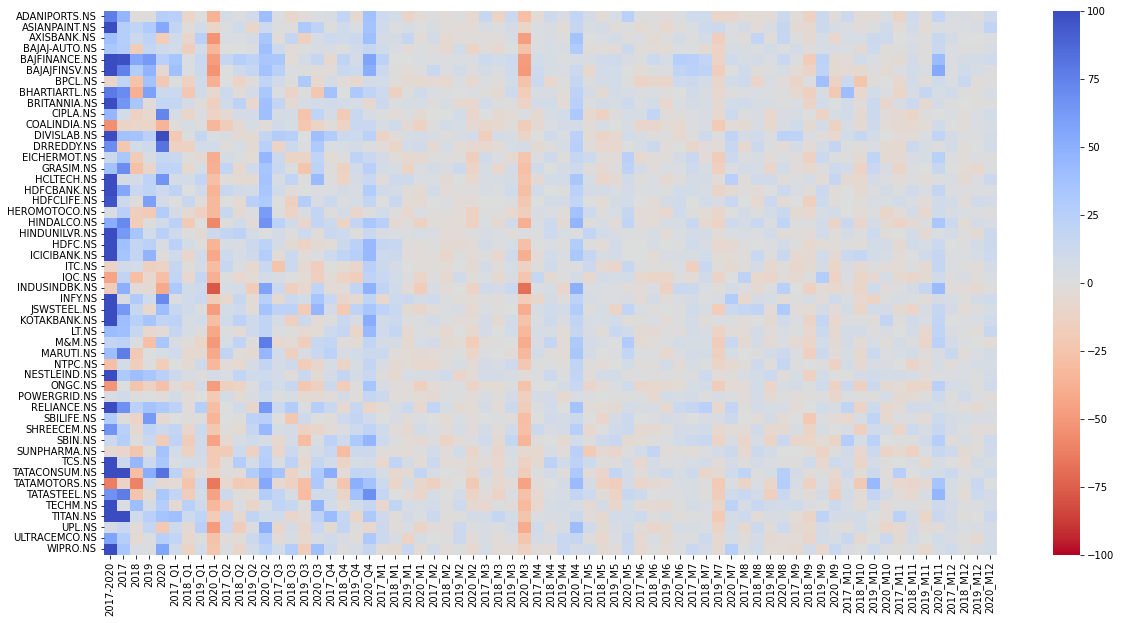

In [3]:
fig = plt.figure(figsize=(20, 10))
y_axis_labels = companies_returns['ticker']
r = sns.heatmap(companies_returns.drop(['ticker'], axis='columns'), cmap='coolwarm_r', yticklabels=y_axis_labels, vmin=-100, vmax=100)

## Visualize backtest returns

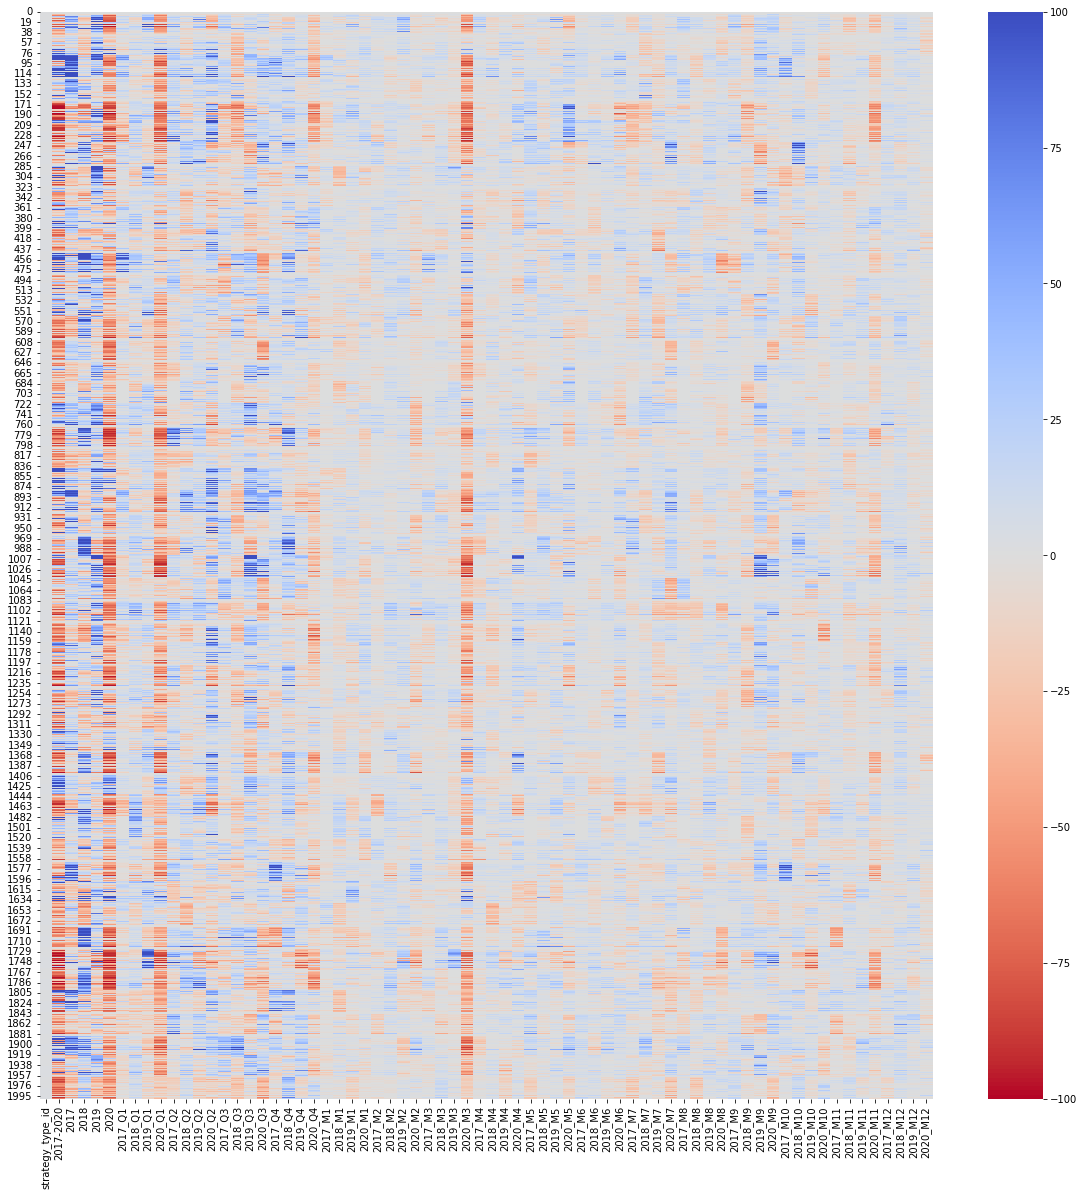

In [4]:
backtests_returns.head()
fig = plt.figure(figsize=(20, 20))
# y_axis_labels = backtests_returns['ticker']
r = sns.heatmap(backtests_returns.drop(['ticker', 'backtest_id'], axis='columns'), cmap='coolwarm_r', vmin=-100, vmax=100)


## Visualization for a single company

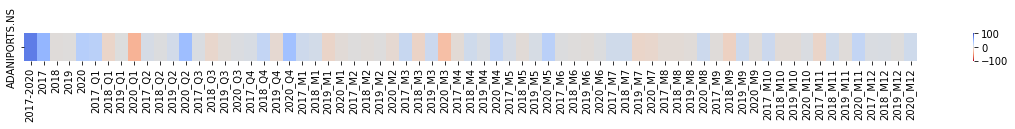

In [5]:
# Company returns
company_ticker = 'ADANIPORTS.NS'
fig = plt.figure(figsize=(20, 0.5))
y_axis_labels = [company_ticker]
r = sns.heatmap(
	companies_returns[companies_returns['ticker'] == company_ticker].drop(['ticker'], axis='columns'),  
	cmap='coolwarm_r',
	yticklabels=y_axis_labels, 
	vmin=-100, 
	vmax=100
)


(40, 70)

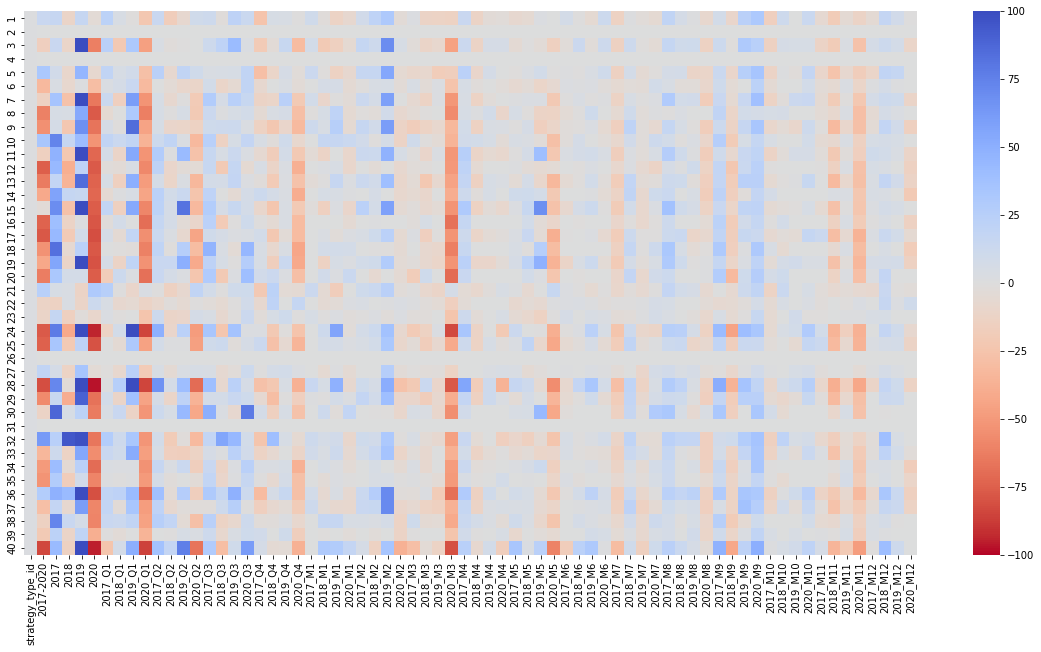

In [6]:
# Company backtests returns
fig = plt.figure(figsize=(20, 10))
y_axis_labels = [i for i in range(1, 41)]
r = sns.heatmap(
	backtests_returns[backtests_returns['ticker'] == company_ticker].drop(['ticker', 'backtest_id'], 
	axis='columns'),
	cmap='coolwarm_r',
	yticklabels=y_axis_labels,
	vmin=-100, 
	vmax=100
)

backtests_returns[backtests_returns['ticker'] == company_ticker].drop(['ticker', 'backtest_id'], axis='columns').shape

### Calculation of Alpha in backtests

In [7]:
# Calculate Alpha
tickers = []
strategy_type_ids=[]
backtest_ids = []
backtest_returns = []
baseline_returns = []
time_periods = []
alphas = []

# New DF to store alpha
alpha_df = pd.DataFrame()
alpha_df['ticker'] = []
alpha_df['strategy_type_id']=[]
alpha_df['backtest_id'] = []
alpha_df['backtest_return'] = []
alpha_df['baseline_return'] = []
alpha_df['time_period'] = []
alpha_df['alpha'] = []

for ticker in companies_returns['ticker']:
    # print(ticker)
    company_baseline = companies_returns[companies_returns['ticker'] == ticker]
    # print(company_baseline)
    index = list(company_baseline.index)[0]
    company_backtests = backtests_returns[backtests_returns['ticker'] == ticker]
    # print(company_backtests)
    cols = list(company_baseline.columns)
    cols.remove('ticker')
    # print(cols)
    # print(len(cols))
    for col in cols:
        for backtest in range(len(company_backtests)):
            # print(company_baseline[col][index])
            # print(list(company_backtests[col])[backtest])
            if (list(company_backtests[col])[backtest] > 0) and (list(company_backtests[col])[backtest] > company_baseline[col][index]):
                # print(f"Alpha of {round(list(company_backtests[col])[backtest] - company_baseline[col][index], 2)} found for {ticker} {col} {list(company_backtests['backtest_id'])[backtest]} with backtest return {list(company_backtests[col])[backtest]} and company baseline of {company_baseline[col][index]}")
                tickers.append(ticker)
                backtest_returns.append(round(list(company_backtests[col])[backtest], 2))
                baseline_returns.append(company_baseline[col][index])
                backtest_ids.append(list(company_backtests['backtest_id'])[backtest])
                strategy_type_ids.append(list(company_backtests['strategy_type_id'])[backtest])
                time_periods.append(col)
                alphas.append(round(list(company_backtests[col])[backtest] - company_baseline[col][index], 2))
			# print(col, backtest)
	# break

alpha_df['ticker'] = tickers
alpha_df['strategy_type_id']= strategy_type_ids
alpha_df['backtest_id'] = backtest_ids
alpha_df['backtest_return'] = backtest_returns
alpha_df['baseline_return'] = baseline_returns
alpha_df['time_period'] = time_periods
alpha_df['alpha'] = alphas

alpha_df


,ticker,strategy_type_id,backtest_id,backtest_return,baseline_return,time_period,alpha
0,ADANIPORTS.NS,1,10,74.11,45.96,2017,28.15
1,ADANIPORTS.NS,1,11,47.90,45.96,2017,1.94
2,ADANIPORTS.NS,1,14,57.31,45.96,2017,11.35
3,ADANIPORTS.NS,1,15,68.75,45.96,2017,22.79
4,ADANIPORTS.NS,1,18,83.45,45.96,2017,37.49
...,...,...,...,...,...,...,...
46709,WIPRO.NS,2,1990,11.30,3.81,2019_M12,7.49
46710,WIPRO.NS,2,1995,8.04,3.81,2019_M12,4.23
46711,WIPRO.NS,1,1963,18.33,7.62,2020_M12,10.71
46712,WIPRO.NS,2,1986,15.31,7.62,2020_M12,7.69


### 

### Put calculated alphas in a csv

In [8]:
alpha_df.to_csv("./ALPHAS.csv", index=False)


## Inferences

In [9]:
# Number of backtest timeperiods that produced alpha
print("Number of backtest time periods that produced alpha: ", (len(alpha_df)))
print("Total number of backtest time periods: ", (2000*69))
print("Percentage of backtest time periods that produced alpha: ", (len(alpha_df)/(2000*69))*100, "%")

Number of backtest time periods that produced alpha:  46714
Total number of backtest time periods:  138000
Percentage of backtest time periods that produced alpha:  33.85072463768116 %


In [10]:
max(alpha_df['alpha'])

1364.42

In [11]:
alpha_df[alpha_df['alpha']==alpha_df['alpha'].max()]

,ticker,strategy_type_id,backtest_id,backtest_return,baseline_return,time_period,alpha
37788,SUNPHARMA.NS,2,1640,1357.84,-6.58,2017-2020,1364.42


In [12]:
min(alpha_df['alpha'])

0.01

In [13]:
alpha_df[alpha_df['alpha']==alpha_df['alpha'].min()]

,ticker,strategy_type_id,backtest_id,backtest_return,baseline_return,time_period,alpha
1992,AXISBANK.NS,1,86,3.36,3.35,2017_Q2,0.01
5921,BPCL.NS,1,257,0.17,0.16,2017_Q2,0.01
16498,HDFCLIFE.NS,1,691,3.87,3.86,2019_M7,0.01
16500,HDFCLIFE.NS,1,695,3.87,3.86,2019_M7,0.01
18312,HINDALCO.NS,1,767,46.63,46.62,2020_M4,0.01
26054,JSWSTEEL.NS,1,1097,0.39,0.38,2019_M3,0.01
28934,M&M.NS,2,1237,5.94,5.93,2018_M8,0.01
29127,M&M.NS,1,1209,6.31,6.30,2017_M12,0.01
29134,M&M.NS,2,1233,6.31,6.30,2017_M12,0.01
34594,RELIANCE.NS,1,1451,4.18,4.17,2017_M6,0.01


In [14]:
type(alpha_df['time_period'][0])
type(alpha_df['alpha'][0])

numpy.float64

In [15]:
# 1. Throughout 2017 - 2020 companies which performed well
# 2.  HDFC Bank performed consistently below baselines throughout the time period taken into considerations.

l1 = []
l2 = []
l3 = []
l4 = []
# time_periods = ['2017','2018','2019','2020']

for i in range(len(alpha_df)):
    
    if(alpha_df['time_period'][i] == '2017'):
        l1.append(alpha_df['alpha'][i])
    if(alpha_df['time_period'][i] == '2018'):
        l2.append(alpha_df['alpha'][i])
    if(alpha_df['time_period'][i] == '2019'):
        l3.append(alpha_df['alpha'][i])
    if(alpha_df['time_period'][i] == '2020'):
        l4.append(alpha_df['alpha'][i])

print("----------------------------")
print("\nThe highest of 2017:",max(l1))
print(alpha_df[alpha_df['alpha']==max(l1)])
print("\nThe lowest of 2017:",min(l1))
print(alpha_df[alpha_df['alpha']==min(l1)])

print("----------------------------")
print("\nThe highest of 2018:")
print(alpha_df[alpha_df['alpha']==max(l2)])
print("\nThe lowest of 2018:",min(l2))
print(alpha_df[alpha_df['alpha']==min(l2)])

print("----------------------------")
print("\nThe highest of 2019:",max(l3))
print(alpha_df[alpha_df['alpha']==max(l3)])
print("\nThe lowest of 2019:",min(l3))
print(alpha_df[alpha_df['alpha']==min(l3)])

print("----------------------------")
print("\nThe highest of 2020:",max(l4))
print(alpha_df[alpha_df['alpha']==max(l4)])
print("\nThe lowest of 2020:",min(l4))
print(alpha_df[alpha_df['alpha']==min(l4)])
print("----------------------------")

----------------------------

The highest of 2017: 376.81
           ticker  strategy_type_id  backtest_id  backtest_return  \
1889  AXISBANK.NS                 2          108           403.11   

      baseline_return time_period   alpha  
1889             26.3        2017  376.81  

The lowest of 2017: 0.07
              ticker  strategy_type_id  backtest_id  backtest_return  \
534    ADANIPORTS.NS                 1            5             1.51   
2875     AXISBANK.NS                 1           88             5.25   
5861         BPCL.NS                 1          258             1.53   
6515         BPCL.NS                 1          245             7.33   
14023      GRASIM.NS                 1          561             3.09   
15100     HCLTECH.NS                 2          626             7.05   
15995    HDFCBANK.NS                 2          675             1.72   
20685   ICICIBANK.NS                 1          888            35.55   
24294  INDUSINDBK.NS                 1   

In [16]:
# 7. What is the profit returned throughout the quarters of 2020?

l1 = []
l2 = []
l3 = []
l4 = []
for i in range(len(alpha_df)):
    if(alpha_df['time_period'][i] == '2020_Q1'):
        l1.append(alpha_df['alpha'][i])
    if(alpha_df['time_period'][i] == '2020_Q2'):
        l2.append(alpha_df['alpha'][i])
    if(alpha_df['time_period'][i] == '2020_Q3'):
        l3.append(alpha_df['alpha'][i])
    if(alpha_df['time_period'][i] == '2020_Q4'):
        l4.append(alpha_df['alpha'][i])


print("----------------------------")
print("\nThe highest of 2020_Q1:",max(l1))
print(alpha_df[alpha_df['alpha']==max(l1)])
# print("\nThe lowest of 2020_Q1:",min(l1))
# print(alpha_df[alpha_df['alpha']==min(l1)])

print("----------------------------")
print("\nThe highest of 2020_Q2:")
print(alpha_df[alpha_df['alpha']==max(l2)])
# print("\nThe lowest of 2020_Q2:",min(l2))
# print(alpha_df[alpha_df['alpha']==max(l2)])

print("----------------------------")
print("\nThe highest of 2020_Q3:",max(l3))
print(alpha_df[alpha_df['alpha']==max(l3)])
# print("\nThe lowest of 2020_Q3:",min(l3))
# print(alpha_df[alpha_df['alpha']==max(l3)])

print("----------------------------")
print("\nThe highest of 2020_Q4:",max(l4))
print(alpha_df[alpha_df['alpha']==max(l4)])
# print("\nThe lowest of 2020_Q4:",min(l4))
# print(alpha_df[alpha_df['alpha']==max(l4)])
print("----------------------------")

----------------------------

The highest of 2020_Q1: 341.4
            ticker  strategy_type_id  backtest_id  backtest_return  \
10568  DIVISLAB.NS                 2          470            344.2   

       baseline_return time_period  alpha  
10568              2.8     2020_Q1  341.4  
----------------------------

The highest of 2020_Q2:
             ticker  strategy_type_id  backtest_id  backtest_return  \
4979  BAJAJFINSV.NS                 1          201           204.23   

      baseline_return time_period   alpha  
4979            36.77     2020_Q2  167.46  
----------------------------

The highest of 2020_Q3: 440.75
              ticker  strategy_type_id  backtest_id  backtest_return  \
23944  INDUSINDBK.NS                 2         1030           460.43   

       baseline_return time_period   alpha  
23944            19.68     2020_Q3  440.75  
----------------------------

The highest of 2020_Q4: 70.22
        ticker  strategy_type_id  backtest_id  backtest_return  \
8828

In [17]:
# 3. Mapping of profitable trades for a particular company from 2017 to 2020. 

l = []
for i in range(len(alpha_df)):
    if(alpha_df['ticker'][i] == 'ADANIPORTS.NS'):
        l.append(alpha_df['alpha'][i])
print("The highest profit for ADANIPORTS trades is : ", max(l))
print(alpha_df[alpha_df['alpha']==max(l)]['ticker'])
print(alpha_df[alpha_df['alpha']==max(l)]['time_period'])

# print("\nThe lowest profit for ADANIPORTS trades is : ", min(l))
# print(alpha_df[alpha_df['alpha']==min(l)]['ticker'])
# print(alpha_df[alpha_df['alpha']==min(l)]['time_period'])

The highest profit for ADANIPORTS trades is :  270.47
39    ADANIPORTS.NS
Name: ticker, dtype: object
39    2019
Name: time_period, dtype: object


In [18]:
# df_adaniports = pd.DataFrame(
#     { 'aplha' : days , 'time_period' : calories })
keys = ['alpha', 'time_period']
adaniports = {}
for key in keys:
	adaniports[key] = []

l1 = []
l2 = []
for i in range(len(alpha_df)):
    if(alpha_df['ticker'][i] == 'ADANIPORTS.NS'):
        l1.append(alpha_df['alpha'][i])
        adaniports['alpha'].append(alpha_df['alpha'][i])
        l2.append(alpha_df['time_period'][i])
        adaniports['time_period'].append(alpha_df['time_period'][i])


# adaniports['alpha'].append(l1)
# adaniports['time_period'].append(l2)

In [19]:
df_adaniports = pd.DataFrame.from_dict(adaniports)
df_adaniports

,alpha,time_period
0,28.15,2017
1,1.94,2017
2,11.35,2017
3,22.79,2017
4,37.49,2017
...,...,...
957,3.98,2019_M12
958,7.91,2019_M12
959,13.60,2019_M12
960,12.78,2019_M12


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(
    { 'Alpha' : l1 , 
     'Time_period': l2 })
df  
# ax = plt.gca()
  
# #use plot() method on the dataframe
#df.plot( 'Alpha' , 'Time_period' )


,Alpha,Time_period
0,28.15,2017
1,1.94,2017
2,11.35,2017
3,22.79,2017
4,37.49,2017
...,...,...
957,3.98,2019_M12
958,7.91,2019_M12
959,13.60,2019_M12
960,12.78,2019_M12


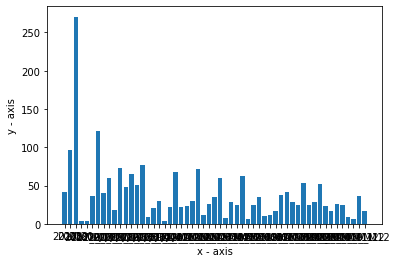

In [21]:
import matplotlib.pyplot as plt
plt.bar(l2,l1)
 
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
# plt.title('My bar chart!')
 
# function to show the plot
plt.show()

In [22]:
companies_returns.head(5)

,ticker,2017-2020,2017,2018,2019,2020,2017_Q1,2018_Q1,2019_Q1,2020_Q1,...,2019_M10,2020_M10,2017_M11,2018_M11,2019_M11,2020_M11,2017_M12,2018_M12,2019_M12,2020_M12
0,ADANIPORTS.NS,76.68,45.96,-2.11,-0.96,26.26,24.03,-10.90,0.46,-36.11,...,-3.50,2.71,-11.55,9.61,-2.29,18.74,2.96,3.55,-0.03,10.39
1,ASIANPAINT.NS,205.59,26.42,20.02,29.63,54.39,18.66,-1.96,7.91,-10.47,...,0.99,9.05,-3.79,7.94,-4.47,2.63,2.02,2.45,3.16,19.37
2,AXISBANK.NS,38.57,26.30,12.12,20.75,-18.03,9.61,-8.76,23.47,-52.62,...,11.95,10.89,0.32,2.47,-0.48,15.50,5.71,0.40,0.59,2.03
3,BAJAJ-AUTO.NS,32.54,26.58,-17.24,17.02,10.35,7.96,-16.69,8.31,-34.28,...,11.55,-2.22,-0.75,3.31,-1.12,14.06,2.83,-0.34,-0.29,3.17
4,BAJFINANCE.NS,508.61,98.34,54.05,61.87,24.71,34.60,2.49,14.82,-47.73,...,2.78,-2.18,-5.45,6.48,-0.94,42.15,2.97,5.91,7.11,9.77


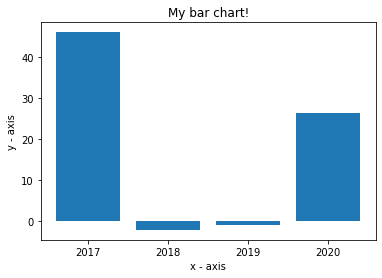

In [23]:
# 4. For a particular company how did the strategy perform per year?


l1 = []
l2 = []
l3 = []
l4 = []
for i in range(len(companies_returns)):
    if(companies_returns['ticker'][i] == 'ADANIPORTS.NS'):
        
        l1.append(companies_returns['2017'][i])
        l2.append(companies_returns['2018'][i])
        l3.append(companies_returns['2019'][i])
        l4.append(companies_returns['2020'][i])
    

time = ['2017', '2018', '2019', '2020']
price = []
price.append(max(l1))
price.append(max(l2))
price.append(max(l3))
price.append(max(l4))

import matplotlib.pyplot as plt
plt.bar(time,price)
 
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('My bar chart!')
 
# function to show the plot
plt.show()

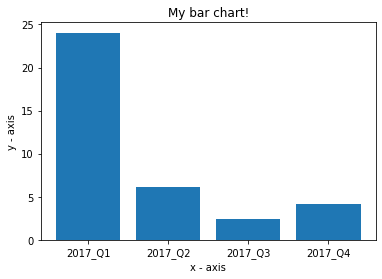

In [24]:
# 5. For a particular company how did the strategy perform per quarter?

l1 = []
l2 = []
l3 = []
l4 = []
for i in range(len(companies_returns)):
    if(companies_returns['ticker'][i] == 'ADANIPORTS.NS'):
        
        l1.append(companies_returns['2017_Q1'][i])
        l2.append(companies_returns['2017_Q2'][i])
        l3.append(companies_returns['2017_Q3'][i])
        l4.append(companies_returns['2017_Q4'][i])
    

time = ['2017_Q1', '2017_Q2', '2017_Q3', '2017_Q4']
price = []
price.append(max(l1))
price.append(max(l2))
price.append(max(l3))
price.append(max(l4))

import matplotlib.pyplot as plt
plt.bar(time,price)
 
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('My bar chart!')
 
# function to show the plot
plt.show()

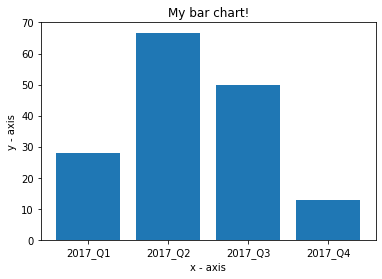

In [25]:
# 6. Performance of the strategy for a particular company for varying time periods.

l1 = []
l2 = []
l3 = []
l4 = []
for i in range(len(backtests_returns)):
    if(backtests_returns['ticker'][i] == 'ADANIPORTS.NS'):
        
        l1.append(backtests_returns['2017_Q1'][i])
        l2.append(backtests_returns['2017_Q2'][i])
        l3.append(backtests_returns['2017_Q3'][i])
        l4.append(backtests_returns['2017_Q4'][i])
    

time = ['2017_Q1', '2017_Q2', '2017_Q3', '2017_Q4']
price = []
price.append(max(l1))
price.append(max(l2))
price.append(max(l3))
price.append(max(l4))

import matplotlib.pyplot as plt
plt.bar(time,price)
 
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('My bar chart!')
 
# function to show the plot
plt.show()

In [26]:
backtests_returns.head(5)

,ticker,strategy_type_id,backtest_id,2017-2020,2017,2018,2019,2020,2017_Q1,2018_Q1,...,2019_M10,2020_M10,2017_M11,2018_M11,2019_M11,2020_M11,2017_M12,2018_M12,2019_M12,2020_M12
0,ADANIPORTS.NS,1,1,14.38,16.39,-11.32,16.00,-4.47,22.50,4.49,...,0.53,13.46,-6.58,-19.48,-4.95,-11.86,-4.82,17.42,9.15,-0.65
1,ADANIPORTS.NS,1,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,ADANIPORTS.NS,1,3,-16.22,14.57,-10.43,114.66,-61.97,23.56,-21.80,...,4.77,4.95,-11.84,-18.99,2.71,-26.27,6.86,12.49,7.27,-10.70
3,ADANIPORTS.NS,1,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ADANIPORTS.NS,1,5,32.68,8.77,-9.18,45.68,-7.80,18.90,4.88,...,-2.07,17.69,-9.53,-25.49,-7.29,-17.45,-10.40,18.82,16.96,0.00


In [27]:
# 7 For every company how did the strategy perform from evry posible time period between 2017-2020 ?


tickers = []
max_returns=[]
min_returns=[]
columns=[]
performance_df = pd.DataFrame()
performance_df['ticker']=[]
a=[]
performance_df['max_return']=[]
performance_df['min_return']=[]
#performance_df['column']=[]


for company in range(len(companies_returns)):
    for ticker in companies_returns['ticker']:
        
        cols = list(company_baseline.columns)
        cols.remove('ticker')
        if(companies_returns['ticker'][company] == ticker):
            for col in cols:
                a.append(companies_returns[col][company])
            
            tickers.append(ticker)
            max_returns.append(max(a))
            min_returns.append(min(a))
            #columns.append()
            a.clear()
        

performance_df['ticker']=tickers
performance_df['max_return']=max_returns
performance_df['min_return']=min_returns
#performance_df['column']=columns
performance_df










,ticker,max_return,min_return
0,ADANIPORTS.NS,76.68,-36.11
1,ASIANPAINT.NS,205.59,-10.89
2,AXISBANK.NS,39.69,-52.62
3,BAJAJ-AUTO.NS,39.74,-34.28
4,BAJFINANCE.NS,508.61,-49.11
5,BAJAJFINSV.NS,201.95,-52.64
6,BPCL.NS,38.66,-37.86
7,BHARTIARTL.NS,78.50,-38.15
8,BRITANNIA.NS,147.80,-16.00
9,CIPLA.NS,73.17,-25.70


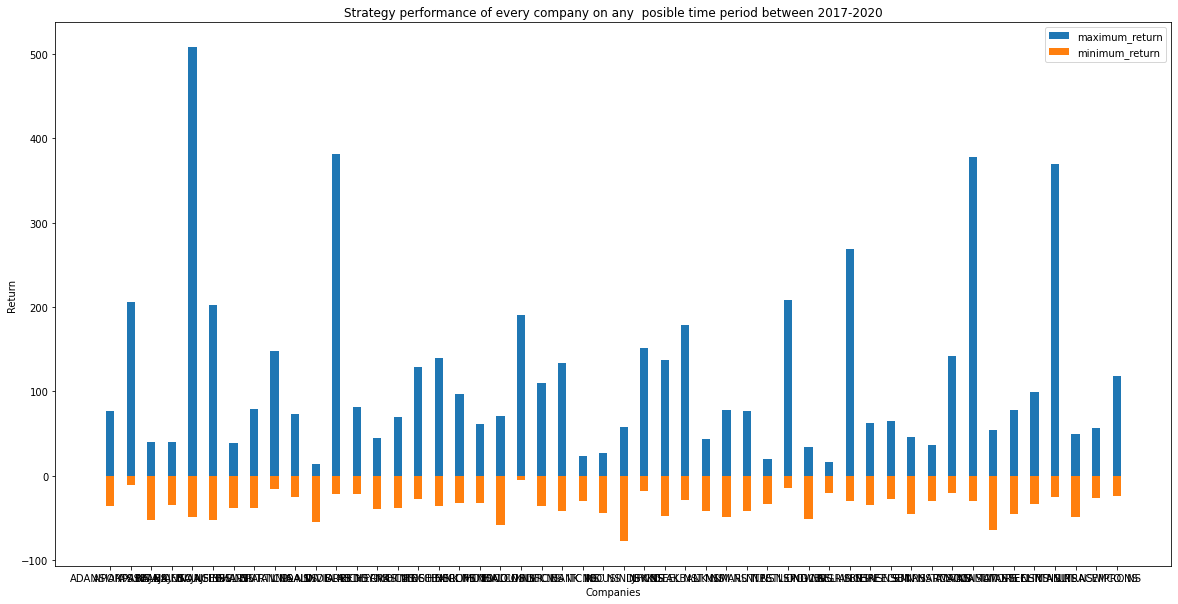

In [40]:
fig = plt.figure(figsize=(20, 10))

x = list(performance_df['ticker'])
y = list(performance_df['min_return'])
z = list(performance_df['max_return'])


X_axis = np.arange(len(x))
  

plt.bar(X_axis , z, 0.4, label = 'maximum_return')
plt.bar(X_axis  , y, 0.4, label = 'minimum_return')

plt.xticks(X_axis, x)
plt.xlabel("Companies")
plt.ylabel("Return")
plt.title("Strategy performance of every company on any  posible time period between 2017-2020")
plt.legend()
plt.show()